# CALL OPTION

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("spy_options_6M_call.xlsx")
df

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,6M SOFR,Implied Vol,Unnamed: 5,Announcement Date,Ex-Date,Record Date,Paid Date,Dividend Amount,Frequency,Type
0,NaT,5.46,421.82,5.28528,12.576,NaN,NaT,2023-09-15,2023-09-18,2023-10-31,1.583169,Quarter,Income
1,2023-06-02,7.45,427.92,5.24547,12.570,NaN,2023-06-15,2023-06-16,2023-06-20,2023-07-31,1.638367,Quarter,Income
2,2023-06-05,7.67,427.10,5.28773,12.515,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
3,2023-06-06,6.64,428.03,5.27695,12.160,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
4,2023-06-07,6.64,426.55,5.27788,11.923,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-11-13,0.04,440.19,5.43478,11.844,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
115,2023-11-14,0.42,448.73,5.38077,11.507,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
116,2023-11-15,0.20,449.68,5.37501,10.215,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
117,2023-11-16,0.08,450.23,5.36347,10.190,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN


In [213]:
df = df[["Date","SPY US 11/17/23 C455 Equity", "SPY US Equity", "6M SOFR", "Implied Vol"]]
df

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,6M SOFR,Implied Vol
0,NaT,5.46,421.82,5.28528,12.576
1,2023-06-02,7.45,427.92,5.24547,12.570
2,2023-06-05,7.67,427.10,5.28773,12.515
3,2023-06-06,6.64,428.03,5.27695,12.160
4,2023-06-07,6.64,426.55,5.27788,11.923
...,...,...,...,...,...
114,2023-11-13,0.04,440.19,5.43478,11.844
115,2023-11-14,0.42,448.73,5.38077,11.507
116,2023-11-15,0.20,449.68,5.37501,10.215
117,2023-11-16,0.08,450.23,5.36347,10.190


# Calculate Delta

In [239]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def calculate_delta(row):
    S = row['SPY US Equity']
    r = row['6M SOFR'] / 100
    sigma = row['Implied Vol'] / 100
    T = (pd.to_datetime('11/17/23') - pd.to_datetime(row['Date'])).days / 365.0

    d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

df['Option Delta'] = df.apply(calculate_delta, axis=1)

print(df)


          Date  SPY US 11/17/23 C455 Equity  SPY US Equity  6M SOFR  \
0          NaT                         5.46         421.82  5.28528   
1   2023-06-02                         7.45         427.92  5.24547   
2   2023-06-05                         7.67         427.10  5.28773   
3   2023-06-06                         6.64         428.03  5.27695   
4   2023-06-07                         6.64         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-13                         0.04         440.19  5.43478   
115 2023-11-14                         0.42         448.73  5.38077   
116 2023-11-15                         0.20         449.68  5.37501   
117 2023-11-16                         0.08         450.23  5.36347   
118 2023-11-17                         0.01         450.79  5.35821   

     Implied Vol  American Delta  P&L Unhedged  P&L Hedged  Option Gamma  \
0         12.576             NaN           0.0         0.0           Na

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/2752358810.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))


In [233]:
import pandas as pd
import numpy as np
from scipy.stats import norm

df['Date'] = pd.to_datetime(df['Date'])

def calculate_american_delta(row, S_boundary):
    S = row['SPY US Equity']
    K = 455
    sigma = row['Implied Vol']

    time_to_expiry = row['Date'] - pd.to_datetime('today')
    T = time_to_expiry.days / 365.0
    r = row['6M SOFR'] / 100
    delta_t = 0.01
    epsilon = 0.01
    mu = 0.02

    dS = S * epsilon * np.exp(-r * delta_t)
    dPV = np.exp(-r * delta_t) * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) * (
            epsilon - mu * delta_t)

    if S < S_boundary:
        return max(dS, dPV, 0)
    else:
        return max(S - K, 0)

S_boundary = 455  # Adjust as needed
df['American Delta'] = df.apply(lambda row: calculate_american_delta(row, S_boundary), axis=1)

print(df[['Date', 'SPY US Equity', 'American Delta']])


          Date  SPY US Equity  American Delta
0          NaT         421.82        4.215971
1   2023-06-02         427.92        4.276956
2   2023-06-05         427.10        4.268742
3   2023-06-06         428.03        4.278042
4   2023-06-07         426.55        4.263249
..         ...            ...             ...
114 2023-11-13         440.19        4.399508
115 2023-11-14         448.73        4.484886
116 2023-11-15         449.68        4.494384
117 2023-11-16         450.23        4.499886
118 2023-11-17         450.79        4.505485

[119 rows x 3 columns]


/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/4016067346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/4016067346.py:20: RuntimeWarning: invalid value encountered in sqrt
  dPV = np.exp(-r * delta_t) * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) * (
/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/4016067346.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

# Calculate Gamma

In [237]:
import pandas as pd
import numpy as np
from scipy.stats import norm


df['Option Gamma'] = np.nan

for i in range(1, len(df)):
    S = df.loc[i, 'SPY US Equity']
    X = 455
    r = df.loc[i, '6M SOFR'] / 100
    sigma = df.loc[i, 'Implied Vol'] / 100
    T = (df.loc[i, 'Date'] - pd.to_datetime(df.loc[i-1, 'Date'])).days / 365.0

    d1_gamma = (np.log(S / X) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))

    
    gamma = norm.pdf(d1_gamma) / (S * sigma * np.sqrt(T))

    df.at[i, 'Option Gamma'] = gamma

print(df[['Date', 'Option Gamma']])


          Date  Option Gamma
0          NaT           NaN
1   2023-06-02           NaN
2   2023-06-05  1.850277e-08
3   2023-06-06  1.819959e-21
4   2023-06-07  1.121533e-24
..         ...           ...
114 2023-11-13  8.442271e-04
115 2023-11-14  1.106397e-02
116 2023-11-15  1.577224e-02
117 2023-11-16  2.502618e-02
118 2023-11-17  1.211570e-02

[119 rows x 2 columns]


In [235]:
def calculate_gamma(row, S_boundary):
    S = row['SPY US Equity']
    K = 455
    sigma = row['Implied Vol']
    
    T = (df.loc[i, 'Date'] - pd.to_datetime(df.loc[i-1, 'Date'])).days / 365.0
    r = df.loc[i, '6M SOFR'] / 100
    delta_t = 0.01  
    epsilon = 0.01  
    mu = 0.02  

    dS = S * epsilon * np.exp(-r * delta_t)
    dPV = np.exp(-r * delta_t) * norm.pdf((np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) * (epsilon - mu * delta_t)

    
    if S < S_boundary:
        return max((dS - dPV) / (S * epsilon), 0)
    else:
        return 0
S_boundary = 455  # Adjust as needed
df['American Delta'] = df.apply(lambda row: calculate_gamma(row, S_boundary), axis=1)

print(df[['Date', 'SPY US Equity', 'American Delta']])

          Date  SPY US Equity  American Delta
0          NaT         421.82             NaN
1   2023-06-02         427.92             NaN
2   2023-06-05         427.10             NaN
3   2023-06-06         428.03             NaN
4   2023-06-07         426.55             NaN
..         ...            ...             ...
114 2023-11-13         440.19             NaN
115 2023-11-14         448.73             NaN
116 2023-11-15         449.68             NaN
117 2023-11-16         450.23             NaN
118 2023-11-17         450.79             NaN

[119 rows x 3 columns]


/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/141555614.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['American Delta'] = df.apply(lambda row: calculate_gamma(row, S_boundary), axis=1)


# Calculate Delta Hedging PnL

In [241]:
import pandas as pd

df['P&L Unhedged'] = 0.0
df['P&L Hedged'] = 0.0

for i in range(1, len(df)):
    delta_s = df.loc[i, 'SPY US Equity'] - df.loc[i - 1, 'SPY US Equity']
    delta_c = df.loc[i, 'SPY US 11/17/23 C455 Equity'] - df.loc[i - 1, 'SPY US 11/17/23 C455 Equity']

    pnl_unhedged = -delta_c

    pnl_hedged = -delta_c + df.loc[i - 1, 'Option Delta'] * delta_s

    df.at[i, 'P&L Unhedged'] = pnl_unhedged
    df.at[i, 'P&L Hedged'] = pnl_hedged

print(df)
df.to_csv("pnl_results_call.csv")


          Date  SPY US 11/17/23 C455 Equity  SPY US Equity  6M SOFR  \
0          NaT                         5.46         421.82  5.28528   
1   2023-06-02                         7.45         427.92  5.24547   
2   2023-06-05                         7.67         427.10  5.28773   
3   2023-06-06                         6.64         428.03  5.27695   
4   2023-06-07                         6.64         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-13                         0.04         440.19  5.43478   
115 2023-11-14                         0.42         448.73  5.38077   
116 2023-11-15                         0.20         449.68  5.37501   
117 2023-11-16                         0.08         450.23  5.36347   
118 2023-11-17                         0.01         450.79  5.35821   

     Implied Vol  American Delta  P&L Unhedged  P&L Hedged  Option Gamma  \
0         12.576             NaN          0.00    0.000000           Na

In [188]:
df[['Date','SPY US 11/17/23 C455 Equity','SPY US Equity','P&L Unhedged','P&L Hedged']].head(20)

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,P&L Unhedged,P&L Hedged
0,NaT,5.46,421.82,0.00,0.000000
1,2023-06-02,7.45,427.92,-1.99,NaN
2,2023-06-05,7.67,427.10,-0.22,-0.504435
3,2023-06-06,6.64,428.03,1.03,1.341640
4,2023-06-07,6.64,426.55,-0.00,-0.500194
5,2023-06-08,6.63,429.13,0.01,0.829137
6,2023-06-09,6.87,429.90,-0.24,0.022959
7,2023-06-12,8.43,433.80,-1.56,-0.188778
8,2023-06-13,9.80,436.66,-1.37,-0.243381
9,2023-06-14,9.56,437.18,0.24,0.462269


In [189]:
df[['Date','SPY US 11/17/23 C455 Equity','SPY US Equity','P&L Unhedged','P&L Hedged']].tail(20)

,Date,SPY US 11/17/23 C455 Equity,SPY US Equity,P&L Unhedged,P&L Hedged
99,2023-10-23,0.14,420.46,0.06,0.039152
100,2023-10-24,0.16,423.63,-0.02,0.037260
101,2023-10-25,0.07,417.55,0.09,-0.046919
102,2023-10-26,0.04,412.55,0.03,-0.026324
103,2023-10-27,0.04,410.68,-0.00,-0.013090
104,2023-10-30,0.03,415.59,0.01,0.038660
105,2023-10-31,0.03,418.20,-0.00,0.012187
106,2023-11-01,0.03,422.66,-0.00,0.017460
107,2023-11-02,0.08,430.76,-0.05,0.001042
108,2023-11-03,0.13,434.69,-0.05,0.013352


In [190]:
print(df['P&L Hedged'].describe())
print()
print(df['P&L Unhedged'].describe())

count    118.000000
mean       0.041312
std        0.382109
min       -1.012427
25%       -0.133378
50%        0.031201
75%        0.206510
max        1.341640
Name: P&L Hedged, dtype: float64

count    119.000000
mean       0.045798
std        1.094054
min       -2.950000
25%       -0.385000
50%        0.020000
75%        0.670000
max        3.170000
Name: P&L Unhedged, dtype: float64


# Graph delta as a time series

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/1886862662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


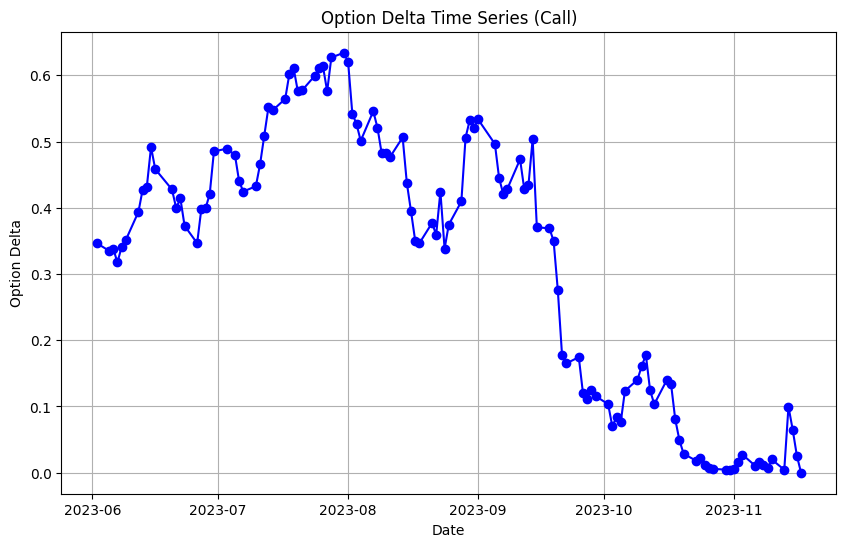

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Delta'], marker='o', linestyle='-', color='b')
plt.title('Option Delta Time Series (Call)')
plt.xlabel('Date')
plt.ylabel('Option Delta')
plt.grid(True)
plt.show()


# Graph gamma as a time series

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/792400982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


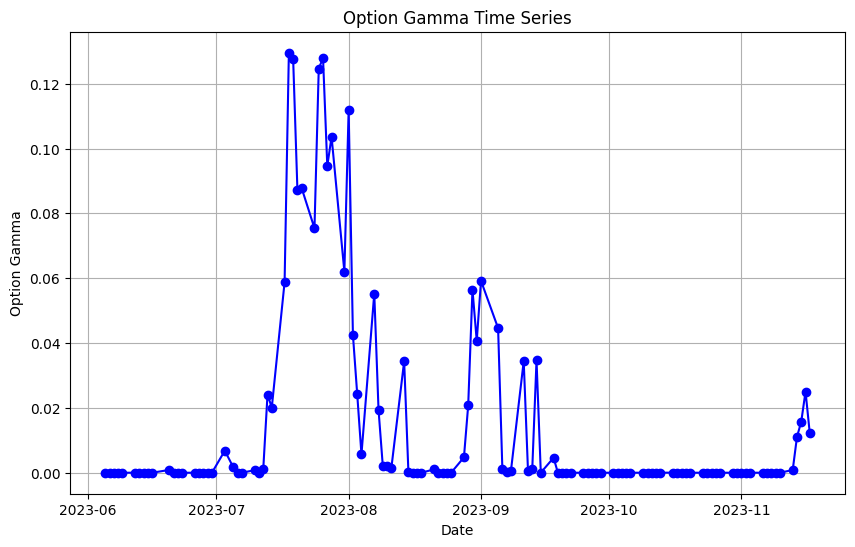

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Gamma'], marker='o', linestyle='-', color='b')
plt.title('Option Gamma Time Series')
plt.xlabel('Date')
plt.ylabel('Option Gamma')
plt.grid(True)
plt.show()

# Graph of stock price

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/1454690228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


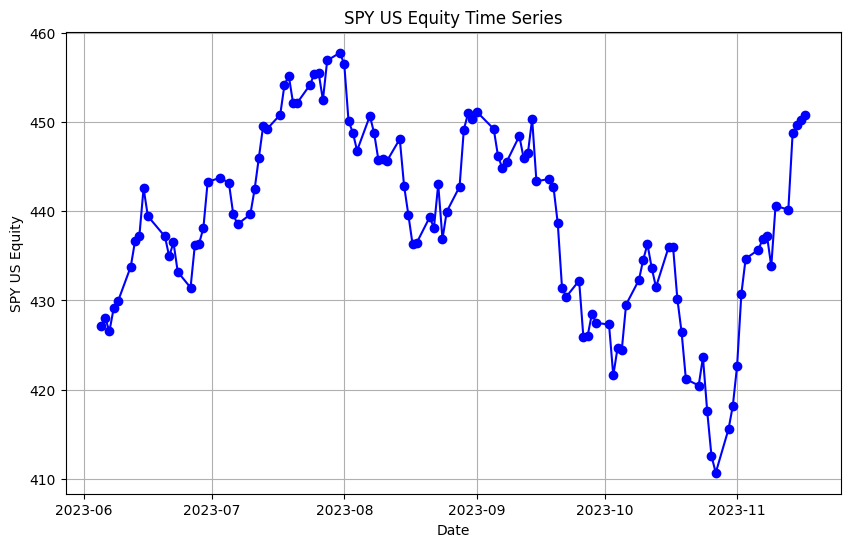

114    440.19
115    448.73
116    449.68
117    450.23
118    450.79
Name: SPY US Equity, dtype: float64

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SPY US Equity'], marker='o', linestyle='-', color='b')
plt.title('SPY US Equity Time Series')
plt.xlabel('Date')
plt.ylabel('SPY US Equity')
plt.grid(True)
plt.show()

# Plot log returns of SPY

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/2448942154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/2448942154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Returns'] = np.log(df['SPY US Equity'] / df['SPY US Equity'].shift(1))


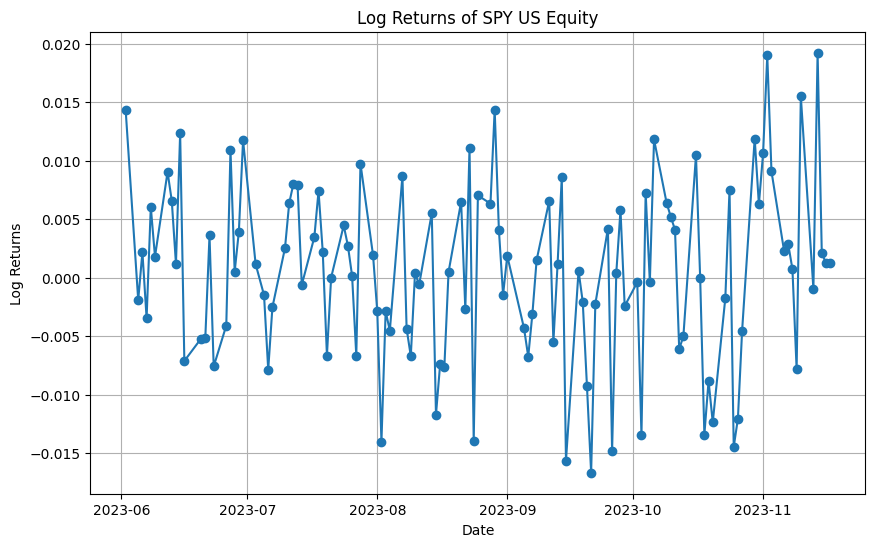

In [194]:
df['Date'] = pd.to_datetime(df['Date'])

df['Log Returns'] = np.log(df['SPY US Equity'] / df['SPY US Equity'].shift(1))

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Log Returns'], marker='o', linestyle='-')
plt.title('Log Returns of SPY US Equity')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()



/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/3563608243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


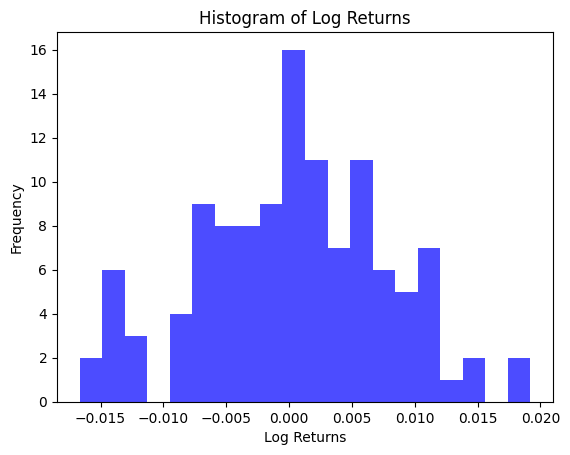

Jarque-Bera test statistic: 0.3851466879143593
P-value: 0.824833819408689
Normaltest statistic: 0.23338159374436923
P-value: 0.8898602982170754


In [195]:
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt


df.dropna(inplace=True)
# Plot the distribution of log returns
plt.hist(df['Log Returns'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

# Perform the Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(df['Log Returns'])
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

# Another way to perform the test using normaltest
nt_stat, nt_p_value = normaltest(df['Log Returns'])
print(f"Normaltest statistic: {nt_stat}")
print(f"P-value: {nt_p_value}")

# Plot 6m SOFR rate

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_3896/615514539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


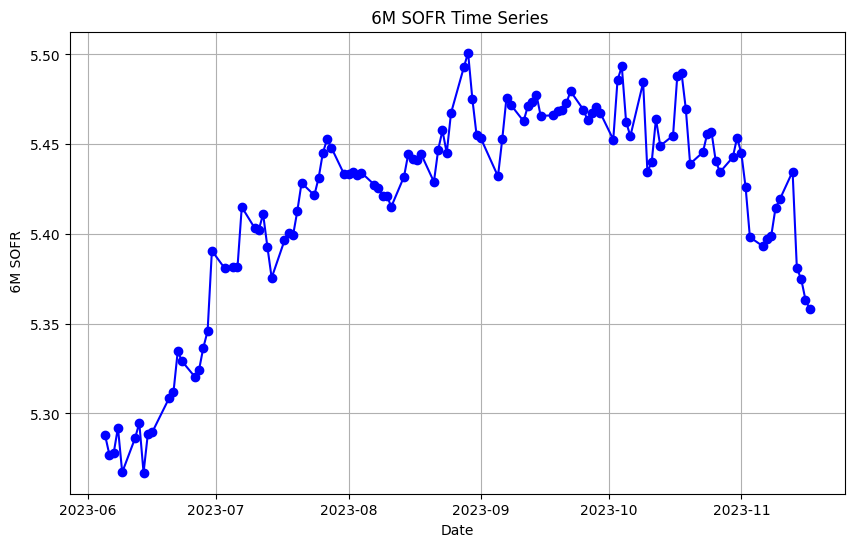

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['6M SOFR'], marker='o', linestyle='-', color='b')
plt.title(' 6M SOFR Time Series')
plt.xlabel('Date')
plt.ylabel(' 6M SOFR')
plt.grid(True)
plt.show()